In [ ]:
!pip install keras-tcn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 16.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from numpy.random import seed
seed(1052023)
from random import randrange
scaler = MinMaxScaler()

In [ ]:
df = pd.read_excel("Temperature in Sao Paulo.xlsx",index_col='Date',parse_dates=True, sheet_name="DJIA")
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(len(test)-window_size):
    row = [[a] for a in scaled_test_input[i:i+window_size]]
    X.append(row)
    y.append(test[i+window_size])
  return np.array(X), np.array(y)

Best hyperparameters

Epoch: 10 | Inputs: 84 | Kernel: 6 | Dropout: 0.2 | Loss: mae




# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range(14):
  n_features = 3
  n_input = 84
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7)-n_input:]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=6, dilations=[1,2,4,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  X, y = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(len(y), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  test=test[n_input:]
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
110/110 [==============================] - 6s 11ms/step - loss: 0.4049 - accuracy: 5.7110e-04 - mean_absolute_error: 0.4049
Epoch 2/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0534 - accuracy: 2.8555e-04 - mean_absolute_error: 0.0534
Epoch 3/10
110/110 [==============================] - 1s 8ms/step - loss: 0.0402 - accuracy: 2.8555e-04 - mean_absolute_error: 0.0402
Epoch 4/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0376 - accuracy: 2.8555e-04 - mean_absolute_error: 0.0376
Epoch 5/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0377 - accuracy: 2.8555e-04 - mean_absolute_error: 0.0377
Epoch 6/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0365 - accuracy: 2.8555e-04 - mean_absolute_error: 0.0365
Epoch 7/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0347 - accuracy: 2.8555e-04 - mean_absolute_error: 0.0347
Epoch 8/10
110/110 [==============================] - 1s 9ms/

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/numpy_.py:161: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch 1/10
110/110 [==============================] - 6s 14ms/step - loss: 0.4999 - accuracy: 2.8555e-04 - mean_absolute_error: 0.4999
Epoch 2/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0641 - accuracy: 2.8555e-04 - mean_absolute_error: 0.0641
Epoch 3/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0404 - accuracy: 2.8555e-04 - mean_absolute_error: 0.0404
Epoch 4/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0392 - accuracy: 2.8555e-04 - mean_absolute_error: 0.0392
Epoch 5/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0377 - accuracy: 2.8555e-04 - mean_absolute_error: 0.0377
Epoch 6/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0366 - accuracy: 2.8555e-04 - mean_absolute_error: 0.0366
Epoch 7/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0346 - accuracy: 2.8555e-04 - mean_absolute_error: 0.0346
Epoch 8/10
110/110 [==============================] - 1s 9ms/

In [ ]:
Accuracy

[51.637744318257425,
 56.66551372406211,
 48.01306811714947,
 48.8607620233735,
 55.454289540482506,
 53.85503547922903,
 45.58658549746063,
 42.94151600841399,
 54.281227442421354,
 59.69465295052259,
 58.217688867315275,
 58.0019647129306,
 45.71652811101332,
 54.58804175627814,
 58.539948233586145]

In [ ]:
RMSE

[0.0027841651228188106,
 0.0027433660228963763,
 0.002791396426895978,
 0.0027271462965745776,
 0.002574387881880448,
 0.002688857850658686,
 0.0027525881079391314,
 0.0028776301406810323,
 0.0025921982106311575,
 0.002638096070646676,
 0.0026050088518097233,
 0.0027425453999219604,
 0.0028851437656300964,
 0.0026095759095418254,
 0.002457945535777481]

In [ ]:
Quasilikelihood

[0.1536724299602659,
 0.13983095836196457,
 0.16716211598304778,
 0.1623056461480774,
 0.1351291938836956,
 0.14524701628990583,
 0.17295853824045793,
 0.19134975341529128,
 0.14002165355555576,
 0.12389249729423245,
 0.12600726226564066,
 0.13589167365791383,
 0.17920188400535877,
 0.14117658451356335,
 0.12057373286029488]

Text(0, 0.5, 'DJIA Realized Volatility')

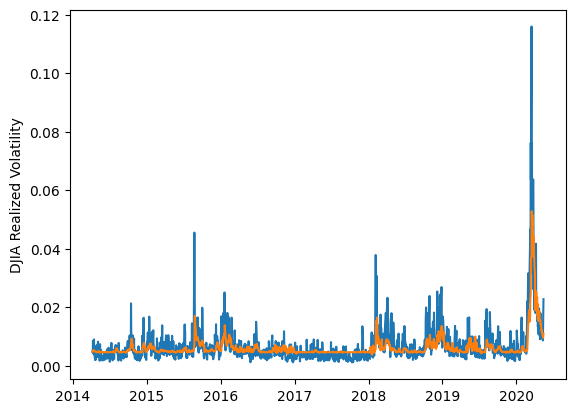

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("DJIA Realized Volatility")

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/3)):
    row = [[a] for a in scaled_test_input[i*3:(i*3)+window_size]]
    X.append(row)
  return np.array(X)

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range (15):
  n_features = 3
  n_input = 84
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=6, dilations=[1,2,4,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  test=test[:len(test)-1]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/3))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
110/110 [==============================] - 5s 9ms/step - loss: 0.3473 - accuracy: 0.3270 - mean_absolute_error: 0.3473
Epoch 2/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0421 - accuracy: 0.3147 - mean_absolute_error: 0.0421
Epoch 3/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0375 - accuracy: 0.3287 - mean_absolute_error: 0.0375
Epoch 4/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0358 - accuracy: 0.3301 - mean_absolute_error: 0.0358
Epoch 5/10
110/110 [==============================] - 1s 13ms/step - loss: 0.0350 - accuracy: 0.3324 - mean_absolute_error: 0.0350
Epoch 6/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0347 - accuracy: 0.3875 - mean_absolute_error: 0.0347
Epoch 7/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0330 - accuracy: 0.4246 - mean_absolute_error: 0.0330
Epoch 8/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0333 - accura

In [ ]:
Accuracy

[47.01651386612359,
 52.66460515371916,
 55.25942607762006,
 48.9506890498598,
 49.66838776449235,
 47.796556665190124,
 46.11195890303965,
 53.7306347169771,
 55.5336422380383,
 46.81693554075721,
 47.22734345746743,
 50.76687640291997,
 38.33646932686773,
 52.055612075798386,
 48.337546317241596]

In [ ]:
RMSE

[0.0027307455469367803,
 0.0026627797136996485,
 0.00271427021307338,
 0.002880430764547062,
 0.00277254384717748,
 0.002900331213998757,
 0.002786410813168524,
 0.002834121569883507,
 0.0028132834372087204,
 0.002928181718080071,
 0.0027289473283079353,
 0.0028438804445420434,
 0.0031084075216067345,
 0.0027705481240437664,
 0.0028980262645896984]

In [ ]:
Quasilikelihood

[0.16588786611262596,
 0.14630283895794824,
 0.14134862899036407,
 0.16628388978415923,
 0.16141812990706195,
 0.17203065076444188,
 0.17508333355974007,
 0.14848383499808576,
 0.14247302797582367,
 0.17424125153372882,
 0.16665494216367643,
 0.15892694275919997,
 0.2121902398075084,
 0.15052937401704797,
 0.1703554120370627]

Text(0, 0.5, 'DJIA Realized Volatility')

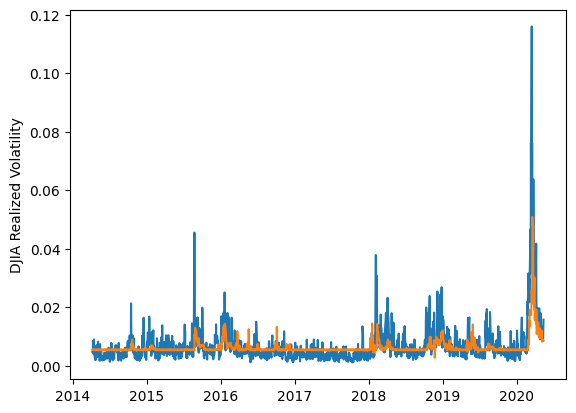

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("DJIA Realized Volatility")

# H=5 Forecasts

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/5)):
    row = [[a] for a in scaled_test_input[i*5:(i*5)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range (15):
  n_features = 3
  n_input = 84
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=6, dilations=[1,2,4,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  test=test[:len(test)-2]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/5))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
110/110 [==============================] - 5s 9ms/step - loss: 0.2054 - accuracy: 0.1930 - mean_absolute_error: 0.2054
Epoch 2/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0381 - accuracy: 0.1491 - mean_absolute_error: 0.0381
Epoch 3/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0353 - accuracy: 0.1068 - mean_absolute_error: 0.0353
Epoch 4/10
110/110 [==============================] - 1s 11ms/step - loss: 0.0350 - accuracy: 0.1271 - mean_absolute_error: 0.0350
Epoch 5/10
110/110 [==============================] - 1s 13ms/step - loss: 0.0361 - accuracy: 0.0891 - mean_absolute_error: 0.0361
Epoch 6/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0345 - accuracy: 0.0939 - mean_absolute_error: 0.0345
Epoch 7/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0332 - accuracy: 0.0999 - mean_absolute_error: 0.0332
Epoch 8/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0319 - accur

In [ ]:
Accuracy

[48.70716147170484,
 40.23855565646958,
 53.55161652685826,
 49.690700880821645,
 49.24613365927204,
 54.08965360883262,
 47.91280414323512,
 54.08205033220938,
 49.96675107384312,
 51.698421769692224,
 50.97121388175396,
 52.26696558755054,
 50.45914712717381,
 50.43647147587429,
 41.19049732366214]

In [ ]:
RMSE

[0.0027954444180043605,
 0.0030117594194270557,
 0.0028422926033982994,
 0.002832414954045438,
 0.0029583919543982352,
 0.002742790833236389,
 0.0027457653547386606,
 0.002712978986675817,
 0.002776171644818082,
 0.0027867388854790746,
 0.002803869446448981,
 0.0027122036646430926,
 0.002820903504763993,
 0.002816204495459618,
 0.0031364328543229277]

In [ ]:
Quasilikelihood

[0.16477975556409924,
 0.20101941415929608,
 0.14921807154839456,
 0.16516824174958106,
 0.17039957740255224,
 0.1450235742329056,
 0.1658908980000127,
 0.1433153559414458,
 0.16064932407355978,
 0.15371396712948635,
 0.1554501346602423,
 0.15014548958362348,
 0.1605341267919829,
 0.1590070691216705,
 0.2041178960471991]

Text(0, 0.5, 'DJIA Realized Volatility')

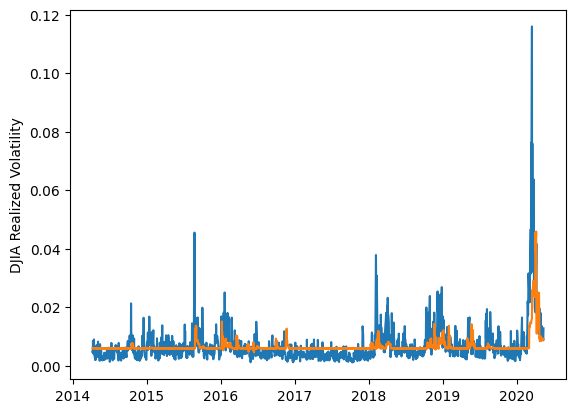

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("DJIA Realized Volatility")

# H=10 Forecasts

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/10)):
    row = [[a] for a in scaled_test_input[i*10:(i*10)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range (14):
  n_features = 3
  n_input = 84
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=6, dilations=[1,2,4,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  test=test[:len(test)-7]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/10))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
110/110 [==============================] - 6s 11ms/step - loss: 0.2888 - accuracy: 0.0991 - mean_absolute_error: 0.2888
Epoch 2/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0393 - accuracy: 0.1088 - mean_absolute_error: 0.0393
Epoch 3/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0374 - accuracy: 0.0554 - mean_absolute_error: 0.0374
Epoch 4/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0365 - accuracy: 0.0885 - mean_absolute_error: 0.0365
Epoch 5/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0342 - accuracy: 0.0614 - mean_absolute_error: 0.0342
Epoch 6/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0338 - accuracy: 0.0682 - mean_absolute_error: 0.0338
Epoch 7/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0360 - accuracy: 0.0685 - mean_absolute_error: 0.0360
Epoch 8/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0335 - accura

In [ ]:
Accuracy

[48.77072083062352,
 52.246011855932004,
 44.99883862824689,
 53.19453137542504,
 41.923476697560666,
 48.85195357644802,
 51.87742686544649,
 48.08282592065157,
 49.38491004222507,
 46.40456130039674,
 53.431632646372094,
 48.733632458908914,
 52.437409701534676,
 42.15093185436991,
 53.78632975931037]

In [ ]:
RMSE

[0.0029089787091204026,
 0.0028358140786043737,
 0.0029949102498851507,
 0.002879408100405392,
 0.0030335772474023403,
 0.0029271430521120873,
 0.0028186461196140987,
 0.002897835764341615,
 0.0029146518908607748,
 0.0029357171436075495,
 0.002831265026215005,
 0.002871622998182163,
 0.0028471026166174028,
 0.0031293867574339043,
 0.0028691979456121537]

In [ ]:
Quasilikelihood

[0.16482438896506962,
 0.15210848489331394,
 0.1769552973770451,
 0.15237812549917332,
 0.19722241757976597,
 0.1675490732906613,
 0.15648395427428888,
 0.16907831307987015,
 0.1654282779679958,
 0.17305303555469248,
 0.1492259998779457,
 0.16618906692824484,
 0.1533371230865012,
 0.2006740194929181,
 0.1501579726648234]

Text(0, 0.5, 'DJIA Realized Volatility')

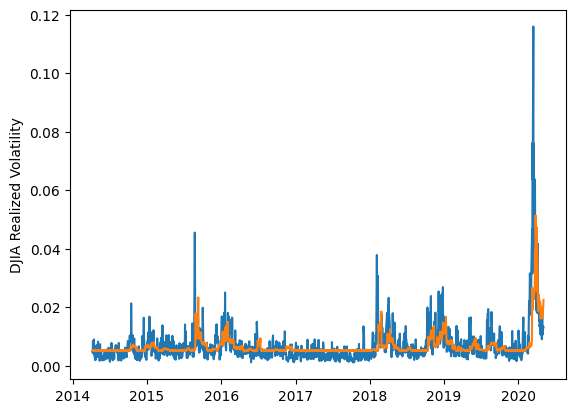

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("DJIA Realized Volatility")

# H=22 Forecasts

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/22)):
    row = [[a] for a in scaled_test_input[i*22:(i*22)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range (14):
  n_features = 3
  n_input = 84
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(TCN(kernel_size=6, dilations=[1,2,4,1], nb_stacks=1,padding='causal',
                dropout_rate=0.2,activation='relu',kernel_initializer='he_normal', input_shape=(n_input, n_features)))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=10)
  test=test[:len(test)-19]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/22))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/10
110/110 [==============================] - 6s 9ms/step - loss: 0.2349 - accuracy: 0.0274 - mean_absolute_error: 0.2349
Epoch 2/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0405 - accuracy: 0.0323 - mean_absolute_error: 0.0405
Epoch 3/10
110/110 [==============================] - 1s 13ms/step - loss: 0.0377 - accuracy: 0.0180 - mean_absolute_error: 0.0377
Epoch 4/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0368 - accuracy: 0.0160 - mean_absolute_error: 0.0368
Epoch 5/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0358 - accuracy: 0.0049 - mean_absolute_error: 0.0358
Epoch 6/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0355 - accuracy: 0.0091 - mean_absolute_error: 0.0355
Epoch 7/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0345 - accuracy: 0.0120 - mean_absolute_error: 0.0345
Epoch 8/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0343 - accura

3/3 [==============================] - 0s 5ms/step
Epoch 1/10
110/110 [==============================] - 5s 9ms/step - loss: 0.2328 - accuracy: 0.0391 - mean_absolute_error: 0.2328
Epoch 2/10
110/110 [==============================] - 1s 11ms/step - loss: 0.0421 - accuracy: 0.0128 - mean_absolute_error: 0.0421
Epoch 3/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0400 - accuracy: 0.0077 - mean_absolute_error: 0.0400
Epoch 4/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0390 - accuracy: 0.0317 - mean_absolute_error: 0.0390
Epoch 5/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0378 - accuracy: 0.0320 - mean_absolute_error: 0.0378
Epoch 6/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0373 - accuracy: 0.3278 - mean_absolute_error: 0.0373
Epoch 7/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0370 - accuracy: 0.0186 - mean_absolute_error: 0.0370
Epoch 8/10
110/110 [==================

3/3 [==============================] - 0s 5ms/step
Epoch 1/10
110/110 [==============================] - 7s 9ms/step - loss: 0.2439 - accuracy: 0.0203 - mean_absolute_error: 0.2439
Epoch 2/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0432 - accuracy: 0.0140 - mean_absolute_error: 0.0432
Epoch 3/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0414 - accuracy: 0.0154 - mean_absolute_error: 0.0414
Epoch 4/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0432 - accuracy: 0.0528 - mean_absolute_error: 0.0432
Epoch 5/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0430 - accuracy: 0.5985 - mean_absolute_error: 0.0430
Epoch 6/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0408 - accuracy: 0.0063 - mean_absolute_error: 0.0408
Epoch 7/10
110/110 [==============================] - 1s 9ms/step - loss: 0.0424 - accuracy: 0.0080 - mean_absolute_error: 0.0424
Epoch 8/10
110/110 [===================

In [ ]:
Accuracy

[44.5404536182498,
 44.377752851811344,
 45.023195969982446,
 47.8903912503859,
 47.0117639108779,
 34.207838231358586,
 41.64491127236252,
 44.71757512635984,
 47.05401698498785,
 46.93440850975006,
 46.757589559929805,
 49.10405444799911,
 44.06841129994288,
 45.93149433779974,
 46.029061681140035]

In [ ]:
RMSE

[0.003102698226359679,
 0.003081639774151948,
 0.003206217318828277,
 0.0030391607293948327,
 0.0030233702865777555,
 0.0032945881174849946,
 0.003178296231460865,
 0.0031279333188185153,
 0.003043557262028761,
 0.0030484515161105772,
 0.003066718697969171,
 0.003004154491353697,
 0.003100693966988419,
 0.0030568314096866985,
 0.0031181148568925135]

In [ ]:
Quasilikelihood

[0.1908405763009098,
 0.1902451067444809,
 0.18697531498466669,
 0.17701144765704208,
 0.18263589866788307,
 0.23699194012242986,
 0.2001613858127784,
 0.1898149911742472,
 0.1828033596596695,
 0.17919882374981974,
 0.1815263873262984,
 0.17309332846011014,
 0.1887263069877181,
 0.18519470919382536,
 0.18391295461706322]

Text(0, 0.5, 'DJIA Realized Volatility')

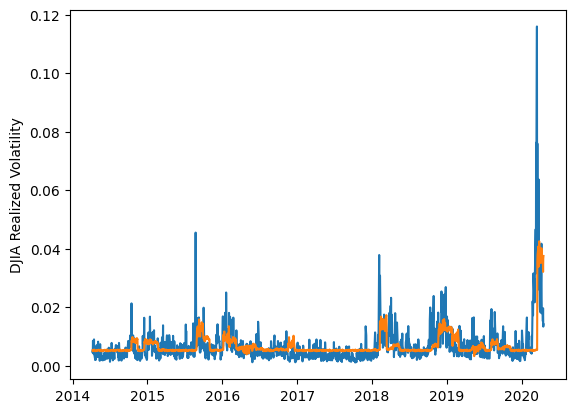

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("DJIA Realized Volatility")